In [38]:
import pandas as pd
train_data=pd.read_csv("data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
test_data = pd.read_csv("data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [41]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid, method=1):
    if method==1:
        model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)
        model.fit(X_train, y_train)
    elif method==2:
        model = XGBClassifier(n_estimators=1000, learning_rate=0.05, early_stopping_rounds=10)
        model.fit(X_train, y_train,eval_set=[(X_valid, y_valid)],verbose=False)
    elif method==3:
        model = SVC(kernel="linear", C=0.025)
        model.fit(X_train, y_train)
    else:
        model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)       
        model.fit(X_train, y_train)
    
    preds_train = model.predict(X_train)
    preds_valid = model.predict(X_valid)
    return accuracy_score(y_valid, preds_valid),accuracy_score(y_train,preds_train)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import SimpleImputer

#given a feature list, return the score
def score_features(features,data_size,method=1):
    train_data_subset = train_data.iloc[0:data_size][:]
    y = train_data_subset["Survived"]    
    X = pd.get_dummies(train_data_subset[features])

    averageScore=0
    train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.7, random_state=0)

    # Imputation
    my_imputer = SimpleImputer()
    imputed_X_train = pd.DataFrame(my_imputer.fit_transform(train_X))
    imputed_X_valid = pd.DataFrame(my_imputer.transform(val_X))

    # Imputation removed column names; put them back
    imputed_X_train.columns = train_X.columns
    imputed_X_valid.columns = val_X.columns        

    score_valid,score_train=score_dataset(imputed_X_train,imputed_X_valid,train_y,val_y,method)
    averageScore+=score_valid
    #print("Training data size: " + str(data_size) + ", training Score: " +str(score_train) + ", validation score: "+ str(score_valid))

    return score_valid,score_train

In [44]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
method=3 #1: random forest, 2: XG Boost, 3: linear SVM

train_data_full = train_data.shape[0]

list_data_size = []
list_train_socre  = []
list_validation_score = []

for size in range(50,train_data_full,50):
    list_data_size.append(size)
    
    score_valid,score_train = score_features(features,size,method)
    
    list_train_socre.append(score_train)
    list_validation_score.append(score_valid)

print("- Data size: ", list_data_size)
print("- Training score: ", list_train_socre)
print("- Validation score: ", list_validation_score)

- Data size:  [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850]
- Training score:  [0.6857142857142857, 0.6571428571428571, 0.7428571428571429, 0.8357142857142857, 0.7942857142857143, 0.7619047619047619, 0.8237704918032787, 0.8285714285714286, 0.7873015873015873, 0.8257142857142857, 0.8051948051948052, 0.7928571428571428, 0.8039647577092511, 0.7791411042944786, 0.7942857142857143, 0.8017857142857143, 0.7781512605042017]
- Validation score:  [0.5333333333333333, 0.7666666666666667, 0.7777777777777778, 0.75, 0.8133333333333334, 0.8444444444444444, 0.7547169811320755, 0.7666666666666667, 0.8148148148148148, 0.74, 0.7696969696969697, 0.7888888888888889, 0.7448979591836735, 0.8009478672985783, 0.7644444444444445, 0.7583333333333333, 0.807843137254902]


Text(0.5, 0, 'Data size')

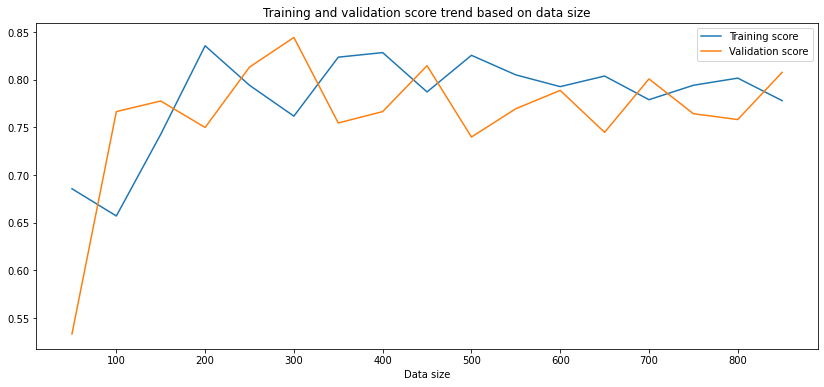

In [45]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(14,6))
plt.title("Training and validation score trend based on data size")

sns.lineplot(y=list_train_socre,x=list_data_size,label="Training score")
sns.lineplot(y=list_validation_score,x=list_data_size, label="Validation score")

plt.xlabel("Data size")

In [46]:
def create_submission():
    #features
    features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]  

    #train and test data 
    y = train_data["Survived"]
    X = pd.get_dummies(train_data[features])
    X_test = pd.get_dummies(test_data[features])

    #train validation split
    train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, random_state=0)

    # Imputation
    my_imputer = SimpleImputer()
    imputed_X_train = pd.DataFrame(my_imputer.fit_transform(train_X))
    imputed_X_val = pd.DataFrame(my_imputer.transform(val_X))
    imputed_X_test = pd.DataFrame(my_imputer.transform(X_test))    

    # Imputation removed column names; put them back
    imputed_X_train.columns = train_X.columns
    imputed_X_val.columns = val_X.columns
    imputed_X_test.columns = X_test.columns         

    #fit model
    model = XGBClassifier(n_estimators=1000, learning_rate=0.05, early_stopping_rounds=10)
    model.fit(imputed_X_train, train_y,eval_set=[(imputed_X_val, val_y)],verbose=False)  
    # model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)
    # model.fit(imputed_X_train, train_y)    

    #prediction  
    preds_test = model.predict(imputed_X_test)

    #output to file
    output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': preds_test})
    output.to_csv('data/submission.csv', index=False)
    
    print("Your submission was successfully saved!")

In [47]:
#create_submission()